# Biblioteki


In [56]:

import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
from google.colab import files
uploaded = files.upload()

Saving taxi_dane.xlsx to taxi_dane.xlsx


In [4]:
df = pd.read_excel(io.BytesIO(uploaded['taxi_dane.xlsx']))
print(df.columns)
df.head()

Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location', 'year', 'month'],
      dtype='object')


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,year,month
0,b57de4fbd42a4fcdfac294083ad896f9b3b19e30,1a0918b9bfea038d074d533672fa8d2a32a9b2628fbb34...,2013-10-01 00:00:00 UTC,2013-10-01 00:30:00 UTC,1800.0,1.49,NaN,NaN,32,out of town,...,Cash,no company name,"41,878865584","-87,625192142","POINT (-87,6251921424 41,8788655841)",NaN,NaN,NaN,2013,10
1,7e0b8a1d91467a8b6c38503812ccf9ceaf81ae46,2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...,2013-10-01 00:00:00 UTC,2013-10-01 00:15:00 UTC,900.0,8.00,NaN,NaN,28,3,...,Cash,no company name,"41,874005383","-87,66351755","POINT (-87,6635175498 41,874005383)","41,96581197","-87,655878786","POINT (-87,6558787862 41,96581197)",2013,10
2,6f461021d891c897195a602bb6d0bc282f7cff30,061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...,2013-10-01 00:15:00 UTC,2013-10-01 00:30:00 UTC,900.0,9.60,NaN,NaN,32,41,...,Cash,no company name,"41,878865584","-87,625192142","POINT (-87,6251921424 41,8788655841)","41,794090253","-87,592310855","POINT (-87,592310855 41,794090253)",2013,10
3,ad92e39b524db2e5ca7e54df5db96d806261ed66,fc662712fcee7cc17c53c79bb57f09d0a612440700aa67...,2013-10-01 00:15:00 UTC,2013-10-01 00:30:00 UTC,1620.0,0.49,1.703108e+10,1.703133e+10,8,33,...,Cash,no company name,"41,892507781","-87,626214906","POINT (-87,6262149064 41,8925077809)","41,859349715","-87,617358006","POINT (-87,6173580061 41,859349715)",2013,10
4,baf5ef44846907d5f0af6f0eb17ae25c784a80c0,873bacf70099d6c3eb461ab1946fcc8b47cfc95fe78c3b...,2013-10-01 00:30:00 UTC,2013-10-01 01:00:00 UTC,2220.0,32.50,NaN,NaN,8,out of town,...,Cash,no company name,"41,899602111","-87,633308037","POINT (-87,6333080367 41,899602111)",NaN,NaN,NaN,2013,10


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unique_key              100000 non-null  object 
 1   taxi_id                 100000 non-null  object 
 2   trip_start_timestamp    100000 non-null  object 
 3   trip_end_timestamp      100000 non-null  object 
 4   trip_seconds            99991 non-null   float64
 5   trip_miles              100000 non-null  float64
 6   pickup_census_tract     45868 non-null   float64
 7   dropoff_census_tract    25840 non-null   float64
 8   pickup_community_area   100000 non-null  object 
 9   dropoff_community_area  100000 non-null  object 
 10  fare                    99999 non-null   float64
 11  tips                    99999 non-null   float64
 12  tolls                   88539 non-null   float64
 13  extras                  99999 non-null   float64
 14  trip_total           

In [6]:
#FUnkcja do pokazania unikalnych wartosci
def analyze_unique_values(data, columns_to_analyze):
    data_to_analyze = data[columns_to_analyze]

    for column in columns_to_analyze:
        unique_values = data_to_analyze[column].unique()
        num_unique_values = len(unique_values)
        print(f"Unique values in {column} ({num_unique_values} unique values):\n{unique_values}\n")

In [7]:
columns_to_analyze = ['pickup_community_area', 'dropoff_community_area','year','payment_type','company','taxi_id']
analyze_unique_values(df, columns_to_analyze)

Unique values in pickup_community_area (68 unique values):
['32' '28' '8' '6' '3' '76' '30' '7' '16' '14' '24' '77' '31' '5' '2' '4'
 '33' '21' '1' '18' '41' '22' '56' '34' '66' '12' '69' '25' '35' '15' '17'
 '13' '39' '57' '38' '29' '19' '10' '68' '23' '44' '26' '11' '63' '64'
 '43' '27' '61' '62' '20' '65' '60' '46' '37' '52' '58' '45' '42' '51'
 '40' '59' '49' '72' 'out of town' '9' '74' '53' '36']

Unique values in dropoff_community_area (23 unique values):
['out of town' '3' '41' '33' '8' '28' '14' '7' '5' '6' '29' '46' '21' '1'
 '52' '31' '11' '24' '54' '47' '59' '60' '34']

Unique values in year (4 unique values):
[2013 2014 2016 2019]

Unique values in payment_type (4 unique values):
['Cash' 'Credit Card' 'Pcard' 'Prcard']

Unique values in company (11 unique values):
['no company name' 'Metro Group' 'Blue Diamond' '303 Taxi' 'Sun Taxi'
 'Globe Taxi' 'City Service' 'Chicago Carriage Cab Corp'
 'Medallion Leasin' 'Chicago Taxicab' 'Flash Cab']

Unique values in taxi_id (1674 uni

In [8]:
# Funkcja zamieniająca 'out of town' na 0 w określonych kolumnach
def replace_out_of_town_with_zero(df, columns):
    for column in columns:
        df[column] = df[column].replace('out of town', '0')
    return df


columns_to_update = ['pickup_community_area', 'dropoff_community_area']
df = replace_out_of_town_with_zero(df, columns_to_update)

print("Unique values in pickup_community_area:", df['pickup_community_area'].unique())
print("Unique values in dropoff_community_area:", df['dropoff_community_area'].unique())


Unique values in pickup_community_area: ['32' '28' '8' '6' '3' '76' '30' '7' '16' '14' '24' '77' '31' '5' '2' '4'
 '33' '21' '1' '18' '41' '22' '56' '34' '66' '12' '69' '25' '35' '15' '17'
 '13' '39' '57' '38' '29' '19' '10' '68' '23' '44' '26' '11' '63' '64'
 '43' '27' '61' '62' '20' '65' '60' '46' '37' '52' '58' '45' '42' '51'
 '40' '59' '49' '72' '0' '9' '74' '53' '36']
Unique values in dropoff_community_area: ['0' '3' '41' '33' '8' '28' '14' '7' '5' '6' '29' '46' '21' '1' '52' '31'
 '11' '24' '54' '47' '59' '60' '34']


In [9]:
#Konwersja danych na odpowiednie typy zmiennych
df['unique_key'] = df['unique_key'].astype('string')  # STRING
df['taxi_id'] = df['taxi_id'].astype('string')  # STRING
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])  # TIMESTAMP
df['trip_end_timestamp'] = pd.to_datetime(df['trip_end_timestamp'])  # TIMESTAMP
df['trip_seconds'] = pd.to_numeric(df['trip_seconds'], errors='coerce').astype('Int64')  # INTEGER
df['trip_miles'] = pd.to_numeric(df['trip_miles'], errors='coerce').astype('float')  # FLOAT
df['pickup_census_tract'] = pd.to_numeric(df['pickup_census_tract'], errors='coerce').astype('Int64')  # INTEGER
df['dropoff_census_tract'] = pd.to_numeric(df['dropoff_census_tract'], errors='coerce').astype('Int64')  # INTEGER
df['pickup_community_area'] = pd.to_numeric(df['pickup_community_area'], errors='coerce').astype('Int64')  # INTEGER
df['dropoff_community_area'] = pd.to_numeric(df['dropoff_community_area'], errors='coerce').astype('Int64')  # INTEGER
df['fare'] = pd.to_numeric(df['fare'], errors='coerce').astype('float')  # FLOAT
df['tips'] = pd.to_numeric(df['tips'], errors='coerce').astype('float')  # FLOAT
df['tolls'] = pd.to_numeric(df['tolls'], errors='coerce').astype('float')  # FLOAT
df['extras'] = pd.to_numeric(df['extras'], errors='coerce').astype('float')  # FLOAT
df['trip_total'] = pd.to_numeric(df['trip_total'], errors='coerce').astype('float')  # FLOAT
df['payment_type'] = df['payment_type'].astype('string')  # STRING
df['company'] = df['company'].astype('string')  # STRING
df['pickup_location'] = df['pickup_location'].astype('string')  # STRING
df['dropoff_location'] = df['dropoff_location'].astype('string')  # STRING

In [10]:
print(df.columns)
df.head()
df.info()

Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location', 'year', 'month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   unique_key              100000 non-null  string             
 1   taxi_id                 100000 non-null  string             
 2   trip_start_timestamp    100000 non-null  datetime64[ns, UTC]
 3   trip_end_timestamp      100000 non-null  datetime64[ns, UTC]
 4   trip_s

In [11]:
# Sprawdzenie duplikatów na podstawie kolumny 'unique_key'
duplicates_unique_key = df[df['unique_key'].duplicated()]
duplicate_count = duplicates_unique_key.shape[0]
print(f"Liczba zduplikowanych wierszy na podstawie 'unique_key': {duplicate_count}")
print(duplicates_unique_key)


Liczba zduplikowanych wierszy na podstawie 'unique_key': 0
Empty DataFrame
Columns: [unique_key, taxi_id, trip_start_timestamp, trip_end_timestamp, trip_seconds, trip_miles, pickup_census_tract, dropoff_census_tract, pickup_community_area, dropoff_community_area, fare, tips, tolls, extras, trip_total, payment_type, company, pickup_latitude, pickup_longitude, pickup_location, dropoff_latitude, dropoff_longitude, dropoff_location, year, month]
Index: []

[0 rows x 25 columns]


In [12]:
# Znalezienie wszystkich zduplikowanych wierszy
duplicates = df[df.duplicated()]
print(f"Liczba zduplikowanych wierszy: {duplicates.shape[0]}")
print(duplicates)

Liczba zduplikowanych wierszy: 0
Empty DataFrame
Columns: [unique_key, taxi_id, trip_start_timestamp, trip_end_timestamp, trip_seconds, trip_miles, pickup_census_tract, dropoff_census_tract, pickup_community_area, dropoff_community_area, fare, tips, tolls, extras, trip_total, payment_type, company, pickup_latitude, pickup_longitude, pickup_location, dropoff_latitude, dropoff_longitude, dropoff_location, year, month]
Index: []

[0 rows x 25 columns]



Value counts for pickup_community_area:
pickup_community_area
8     24390
32    12496
0     11515
6      8471
76     7910
      ...  
52        2
74        2
63        2
68        2
72        1
Name: count, Length: 68, dtype: Int64



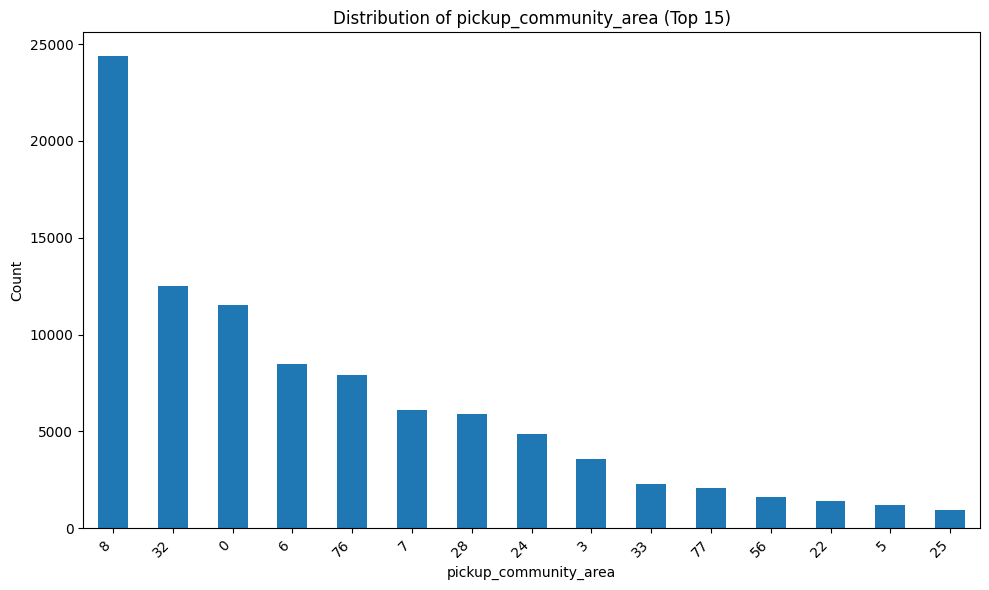


Value counts for dropoff_community_area:
dropoff_community_area
0     44885
8     20361
33    11463
3      7926
28     5037
7      3627
6      1906
41     1902
14     1829
5       412
29      168
21      141
46      119
1        83
52       51
31       33
24       29
11       14
59        5
47        4
54        3
60        1
34        1
Name: count, dtype: Int64



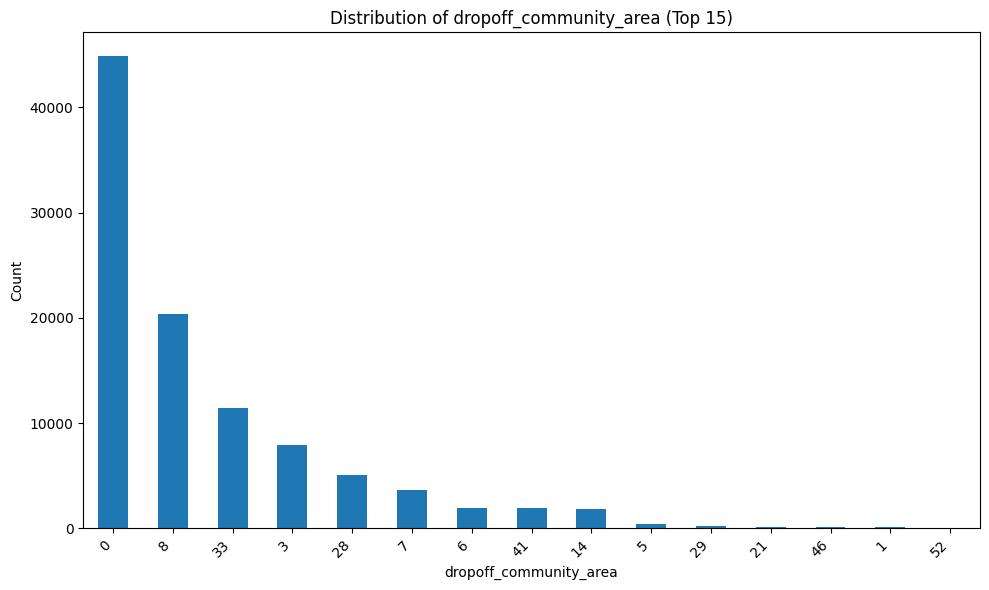


Value counts for year:
year
2013    88053
2016    11499
2014      427
2019       21
Name: count, dtype: int64



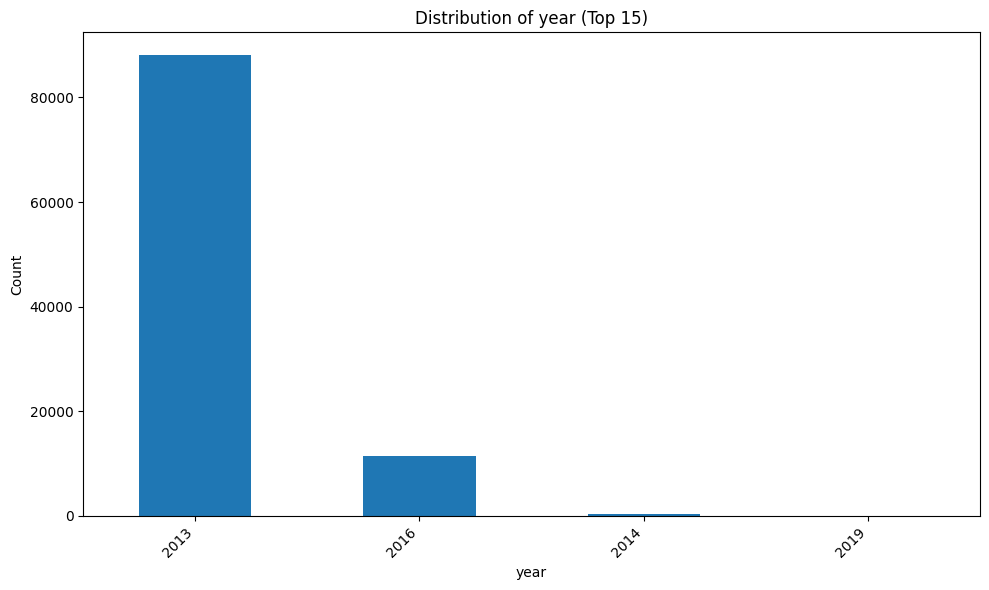


Value counts for payment_type:
payment_type
Cash           74562
Credit Card    25377
Pcard             38
Prcard            23
Name: count, dtype: Int64



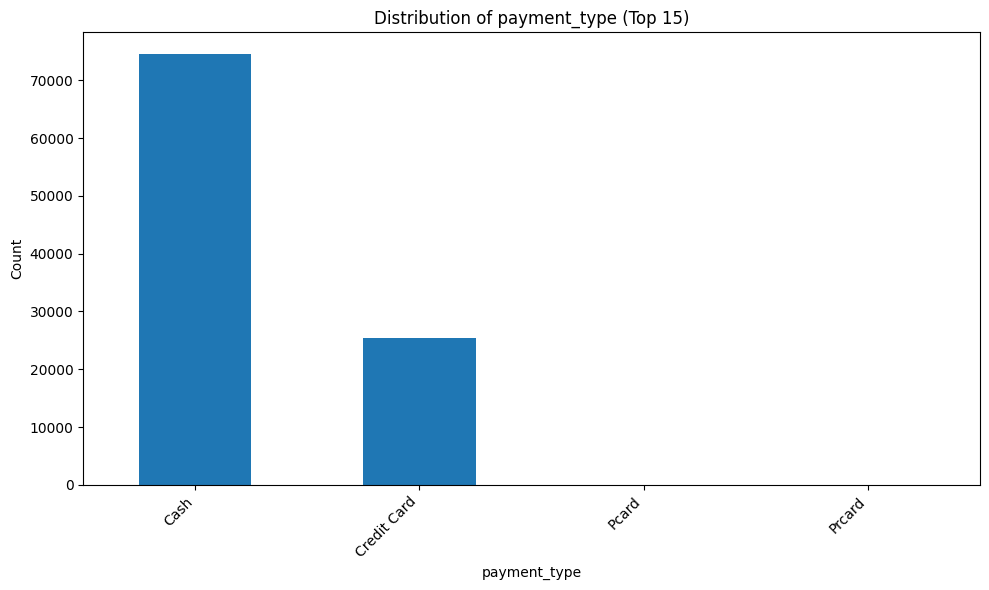


Value counts for company:
company
no company name              88480
303 Taxi                      6177
Metro Group                   5282
Sun Taxi                        31
Globe Taxi                      12
Chicago Carriage Cab Corp        6
City Service                     4
Medallion Leasin                 4
Flash Cab                        2
Blue Diamond                     1
Chicago Taxicab                  1
Name: count, dtype: Int64



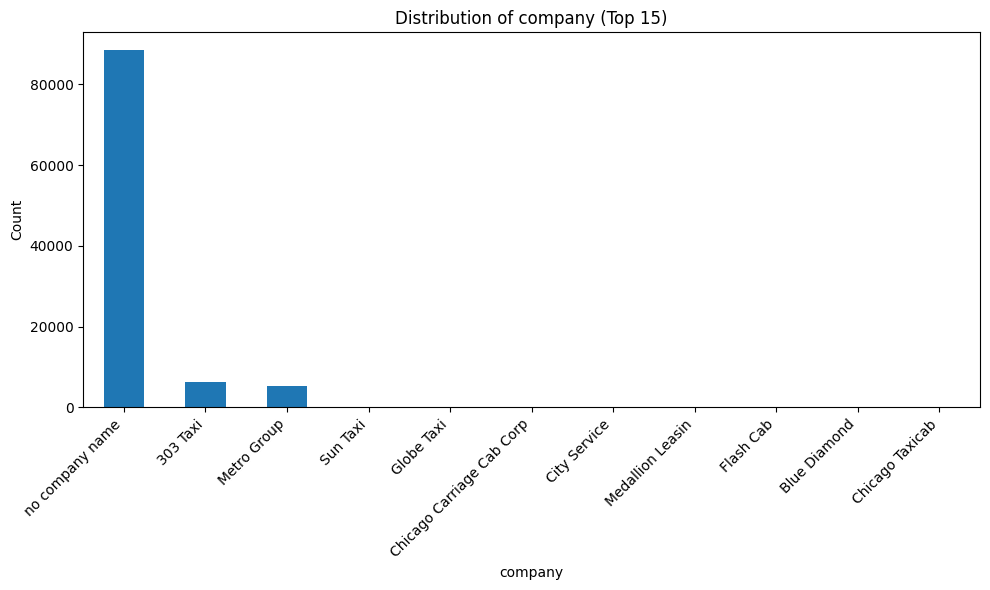


Value counts for taxi_id:
taxi_id
6adb02556453c79096b14273579cbc9db7df43dd51e443d7c851eb1b44409f91014edba53645d741741efdf5c56f8f615fdabaca50d0d5b64300c87cc80ce144    2152
1897ed17bef32c8721aaeffd8239d3e1a49222c0eb602b5d21f2dbca59b67d9ef278371f1d81404e8bea3bda49e7dcb615e3dcb5aab02a77870fd981e50db829    1823
c5b1c846a512e318ac1ef42961a089355a5ad698a9e4baf0af1edbd422c8fc56a750893eda8e927dc63ebcf86f8f09b86cabe663c01fcb3999e5db94ac9901d1    1413
2e4af8d275dbd5afc012606bc94354705d8a438dbb10d74cdbbd9c0db613770b9368baf9d6de1a062aa532e4a34e4fd0241d721d7a114d4d3f39d60bb05744f4    1401
b4e899d3fb518368ac4f53a02668b80a45739527af6ead3fdac2b0c6fa0cf4a6b6f57b1524bf50532c22a89a18899ab16c91c19c544763717d64aef3eed64915    1400
                                                                                                                                    ... 
aadc888419e4c76f335befb26014efac1fc8b28e6045bff706ef0b450486967b3a9799e06fdd8dc7c13bcf5351085eb3eb21be2eb5bc2eb0c9bf4070ccd8d1f8       1
9217bd

<ipython-input-13-69cf9491fe38>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Poprawa wyglądu wykresu


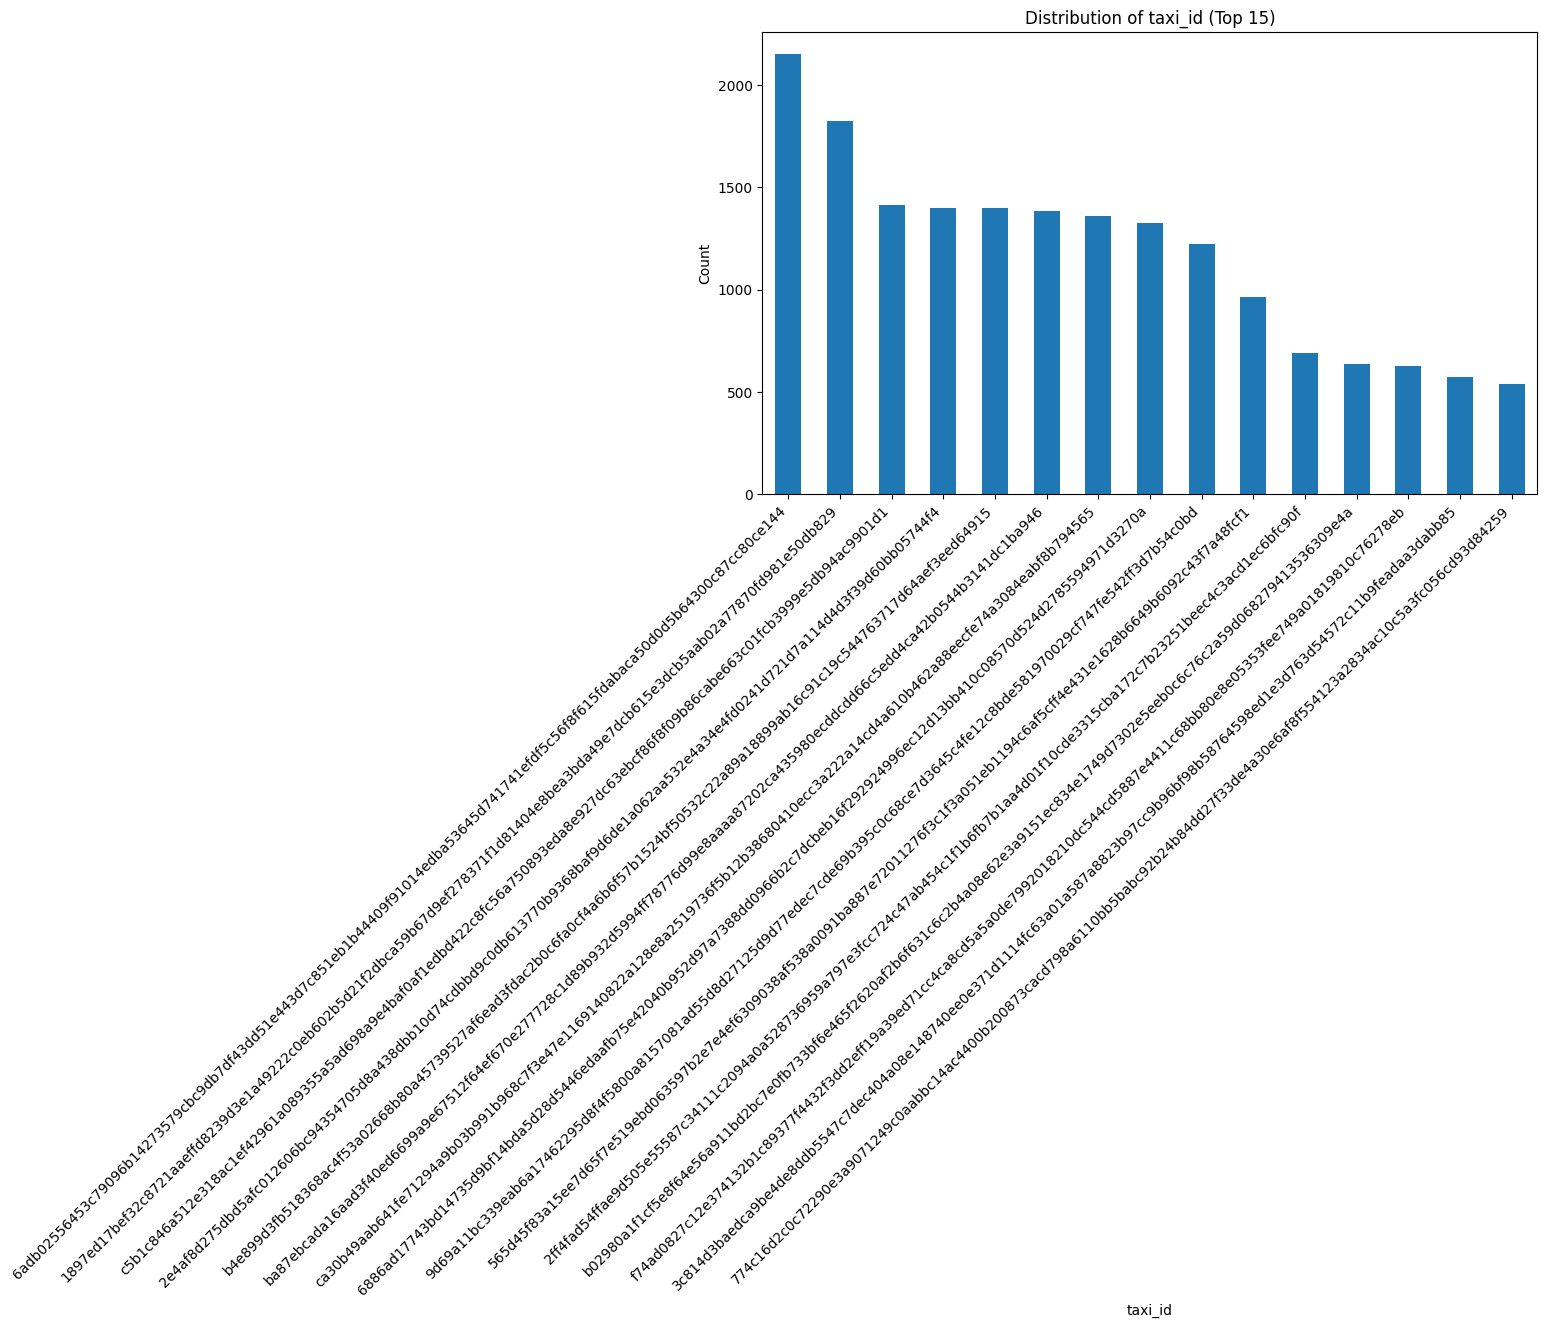

In [13]:
#Funkcja do wyświetlania histogramów dla najczęściej występujących kategorii
# oraz wyświetlania liczby wystąpień dla wszystkich kategorii
def visualize_and_count_values(data, columns_to_visualize, top_n=None):
    for column in columns_to_visualize:
        # Obliczanie wartości
        value_counts = data[column].value_counts()


        print(f"\nValue counts for {column}:\n{value_counts}\n")

        if top_n:
            value_counts_to_plot = value_counts.head(top_n)
        else:
            value_counts_to_plot = value_counts

        plt.figure(figsize=(10, 6))
        value_counts_to_plot.plot(kind='bar')
        plt.title(f'Distribution of {column} (Top {top_n})')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()


columns_to_visualize = ['pickup_community_area', 'dropoff_community_area', 'year', 'payment_type', 'company', 'taxi_id']

# Wywołanie funkcji z ograniczeniem do 15 najczęstszych wartości na wykresie
visualize_and_count_values(df, columns_to_visualize, top_n=15)



In [14]:

def remove_columns(df, columns_to_remove):
    return df.drop(columns=columns_to_remove, axis=1)

# Kolumny do usunięcia
columns_to_remove = [
    'pickup_census_tract', 'dropoff_census_tract',
    'pickup_latitude', 'pickup_longitude', 'pickup_location',
    'dropoff_latitude', 'dropoff_longitude', 'dropoff_location', 'trip_start_timestamp', 'trip_end_timestamp',
]

df_cleaned = remove_columns(df, columns_to_remove)
df_cleaned.head()


,unique_key,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,year,month
0,b57de4fbd42a4fcdfac294083ad896f9b3b19e30,1a0918b9bfea038d074d533672fa8d2a32a9b2628fbb34...,1800,1.49,32,0,31.45,0.0,0.0,5.5,36.95,Cash,no company name,2013,10
1,7e0b8a1d91467a8b6c38503812ccf9ceaf81ae46,2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...,900,8.00,28,3,18.45,0.0,0.0,0.0,18.45,Cash,no company name,2013,10
2,6f461021d891c897195a602bb6d0bc282f7cff30,061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...,900,9.60,32,41,21.05,0.0,0.0,0.0,21.05,Cash,no company name,2013,10
3,ad92e39b524db2e5ca7e54df5db96d806261ed66,fc662712fcee7cc17c53c79bb57f09d0a612440700aa67...,1620,0.49,8,33,16.25,0.0,0.0,1.0,17.25,Cash,no company name,2013,10
4,baf5ef44846907d5f0af6f0eb17ae25c784a80c0,873bacf70099d6c3eb461ab1946fcc8b47cfc95fe78c3b...,2220,32.50,8,0,61.45,0.0,0.0,0.0,61.45,Cash,no company name,2013,10


In [15]:
# Funkcja do obliczania prędkości na godzinę na podstawie kolumn 'trip_seconds' i 'trip_miles'
def calculate_speed(data):
    trip_hours = data['trip_seconds'] / 3600


    data['Speed'] = data['trip_miles'] / trip_hours
    data['Speed'].replace([np.inf, -np.inf], np.nan, inplace=True)

    return data


df_with_speed = calculate_speed(df_cleaned)


print(df_with_speed[['trip_seconds', 'trip_miles', 'Speed']].head())

   trip_seconds  trip_miles      Speed
0          1800        1.49       2.98
1           900        8.00       32.0
2           900        9.60       38.4
3          1620        0.49   1.088889
4          2220       32.50  52.702703


In [16]:
# Funkcja do usuwania wierszy zawierających wartości NaN
def remove_na_values(data):
    return data.dropna()

df_with_speed = remove_na_values(df_with_speed)
print(df_with_speed.info())




<class 'pandas.core.frame.DataFrame'>
Index: 87988 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              87988 non-null  string 
 1   taxi_id                 87988 non-null  string 
 2   trip_seconds            87988 non-null  Int64  
 3   trip_miles              87988 non-null  float64
 4   pickup_community_area   87988 non-null  Int64  
 5   dropoff_community_area  87988 non-null  Int64  
 6   fare                    87988 non-null  float64
 7   tips                    87988 non-null  float64
 8   tolls                   87988 non-null  float64
 9   extras                  87988 non-null  float64
 10  trip_total              87988 non-null  float64
 11  payment_type            87988 non-null  string 
 12  company                 87988 non-null  string 
 13  year                    87988 non-null  int64  
 14  month                   87988 non-null  int

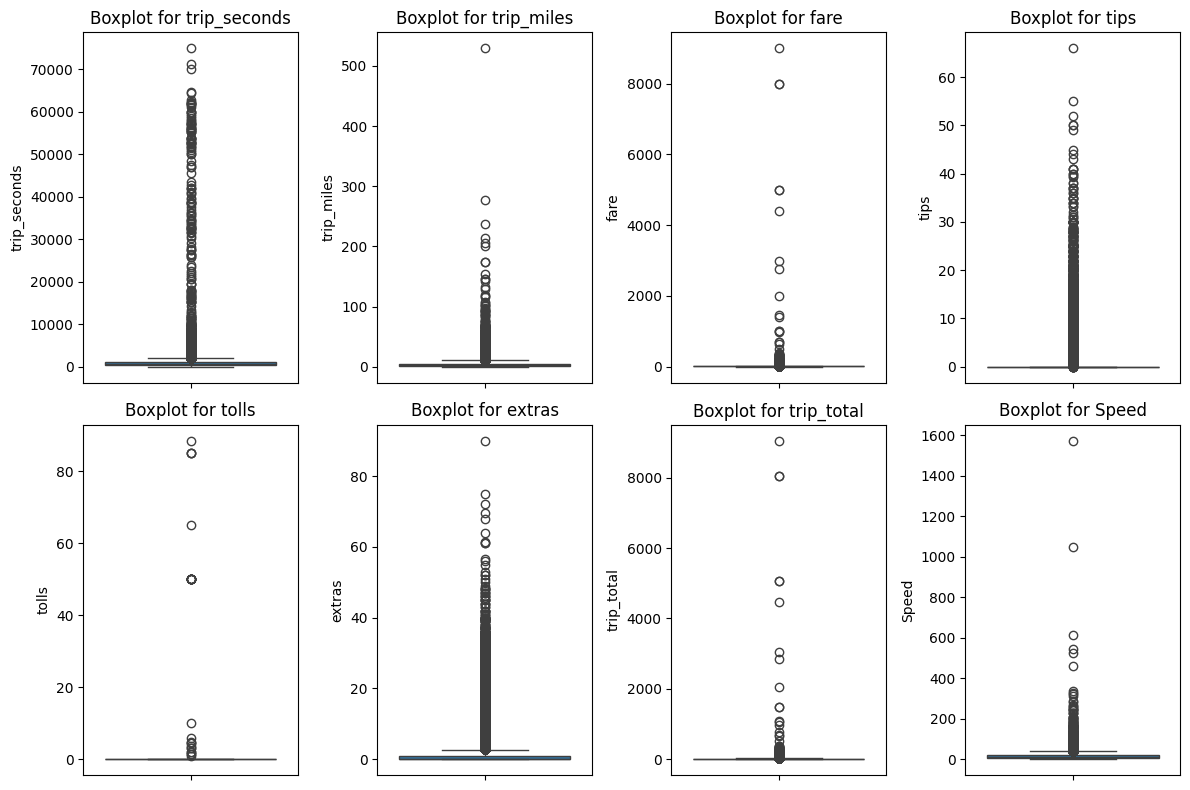

In [17]:
def plot_boxplots(data, columns_to_plot):
    plt.figure(figsize=(12, 8))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(y=data[column])
        plt.title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()


columns_to_plot = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'Speed']


plot_boxplots(df_with_speed, columns_to_plot)

Trip seconds

In [18]:
def get_outlier_bounds(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

lower_bound, upper_bound = get_outlier_bounds(df_with_speed, 'trip_seconds')

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

Lower bound for outliers: -570.0
Upper bound for outliers: 2070.0


In [30]:
# Funkcja do filtrowania danych na podstawie wartości w kolumnie
def filter_data_by_bounds(data, column, lower_bound, upper_bound):
    return data[(data[column] > lower_bound) & (data[column] < upper_bound)]


lower_bound = 0
upper_bound = 2070
df_filtered = filter_data_by_bounds(df_with_speed, 'trip_seconds', lower_bound, upper_bound)



Mediana dla 'trip_seconds' w minutach: 11.0
Średnia dla 'trip_seconds' w minutach: 12.351899928508487


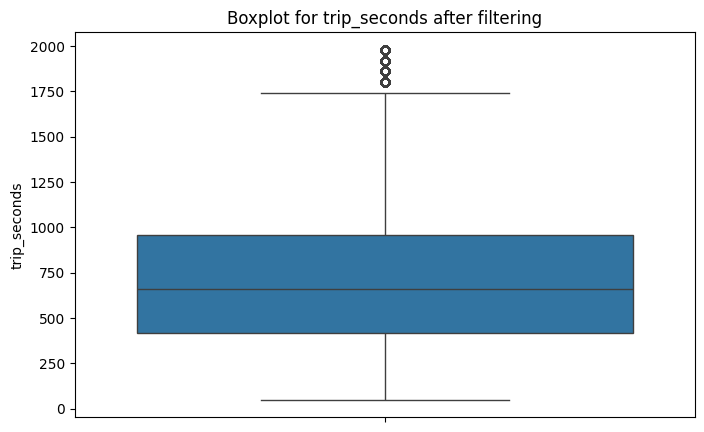

In [29]:
# Funkcja do wyświetlenia boxplotu dla 'trip_seconds'
def plot_boxplot_for_trip_seconds(data):
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=data['trip_seconds'])
    plt.title('Boxplot for trip_seconds after filtering')

    median_value = data['trip_seconds'].median() / 60
    mean_value = data['trip_seconds'].mean() / 60

    print(f"Mediana dla 'trip_seconds' w minutach: {median_value}")
    print(f"Średnia dla 'trip_seconds' w minutach: {mean_value}")
    plt.title('Boxplot for trip_seconds after filtering')

    plt.show()


plot_boxplot_for_trip_seconds(df_filtered)

trip_miles

Lower bound for trip_miles: -3.9900000000000007
Upper bound for trip_miles: 9.05
Mediana dla trip_miles po filtracji: 1.83
Średnia dla trip_miles po filtracji: 2.400976884975234


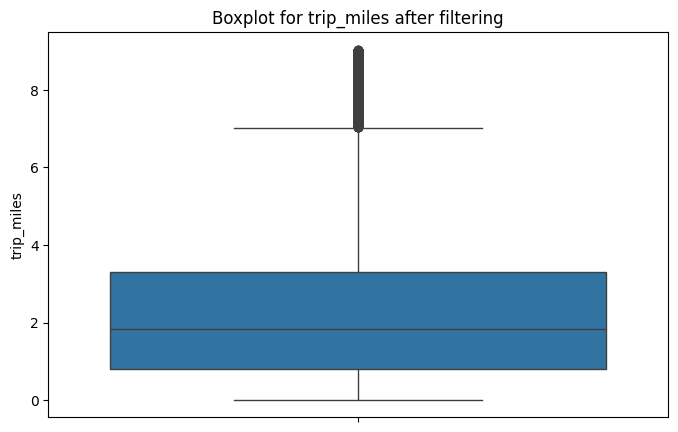

In [31]:

# Obliczenie outlier bounds dla trip_miles
lower_bound_miles, upper_bound_miles = get_outlier_bounds(df_filtered, 'trip_miles')

print(f"Lower bound for trip_miles: {lower_bound_miles}")
print(f"Upper bound for trip_miles: {upper_bound_miles}")

# Filtrowanie danych dla trip_miles (tylko wartości od 0 do upper_bound)
df_filtered_miles = df_filtered[(df_filtered['trip_miles'] > 0) & (df_filtered['trip_miles'] < upper_bound_miles)]

median_trip_miles = df_filtered_miles['trip_miles'].median()
mean_trip_miles = df_filtered_miles['trip_miles'].mean()

print(f"Mediana dla trip_miles po filtracji: {median_trip_miles}")
print(f"Średnia dla trip_miles po filtracji: {mean_trip_miles}")

plt.figure(figsize=(8, 5))
sns.boxplot(y=df_filtered_miles['trip_miles'])
plt.title('Boxplot for trip_miles after filtering')
plt.show()


trip total

Lower bound for trip_total: -3.8999999999999986
Upper bound for trip_total: 26.9
Mediana dla trip_total po filtracji: 9.85
Średnia dla trip_total po filtracji: 10.919481924086634


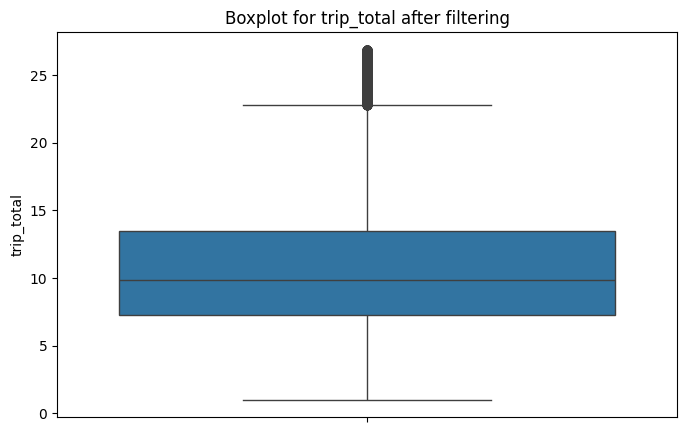

In [37]:


# Obliczenie outlier bounds dla trip_total
lower_bound_trip_total, upper_bound_trip_total = get_outlier_bounds(df_filtered, 'trip_total')

print(f"Lower bound for trip_total: {lower_bound_trip_total}")
print(f"Upper bound for trip_total: {upper_bound_trip_total}")

# Filtrowanie danych dla trip_total (tylko wartości od 0 do upper_bound)
df_filtered_trip_total = df_filtered[(df_filtered['trip_total'] > 0) & (df_filtered['trip_total'] < upper_bound_trip_total)]

# Obliczenie mediany i średniej dla trip_total po filtracji
median_trip_total = df_filtered_trip_total['trip_total'].median()
mean_trip_total = df_filtered_trip_total['trip_total'].mean()

print(f"Mediana dla trip_total po filtracji: {median_trip_total}")
print(f"Średnia dla trip_total po filtracji: {mean_trip_total}")

# Wyświetlenie nowego boxplotu dla trip_total
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_filtered_trip_total['trip_total'])
plt.title('Boxplot for trip_total after filtering')
plt.show()



<class 'pandas.core.frame.DataFrame'>
Index: 71179 entries, 1 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              71179 non-null  string 
 1   taxi_id                 71179 non-null  string 
 2   trip_seconds            71179 non-null  Int64  
 3   trip_miles              71179 non-null  float64
 4   pickup_community_area   71179 non-null  Int64  
 5   dropoff_community_area  71179 non-null  Int64  
 6   fare                    71179 non-null  float64
 7   tips                    71179 non-null  float64
 8   tolls                   71179 non-null  float64
 9   extras                  71179 non-null  float64
 10  trip_total              71179 non-null  float64
 11  payment_type            71179 non-null  string 
 12  company                 71179 non-null  string 
 13  year                    71179 non-null  int64  
 14  month                   71179 non-null  int

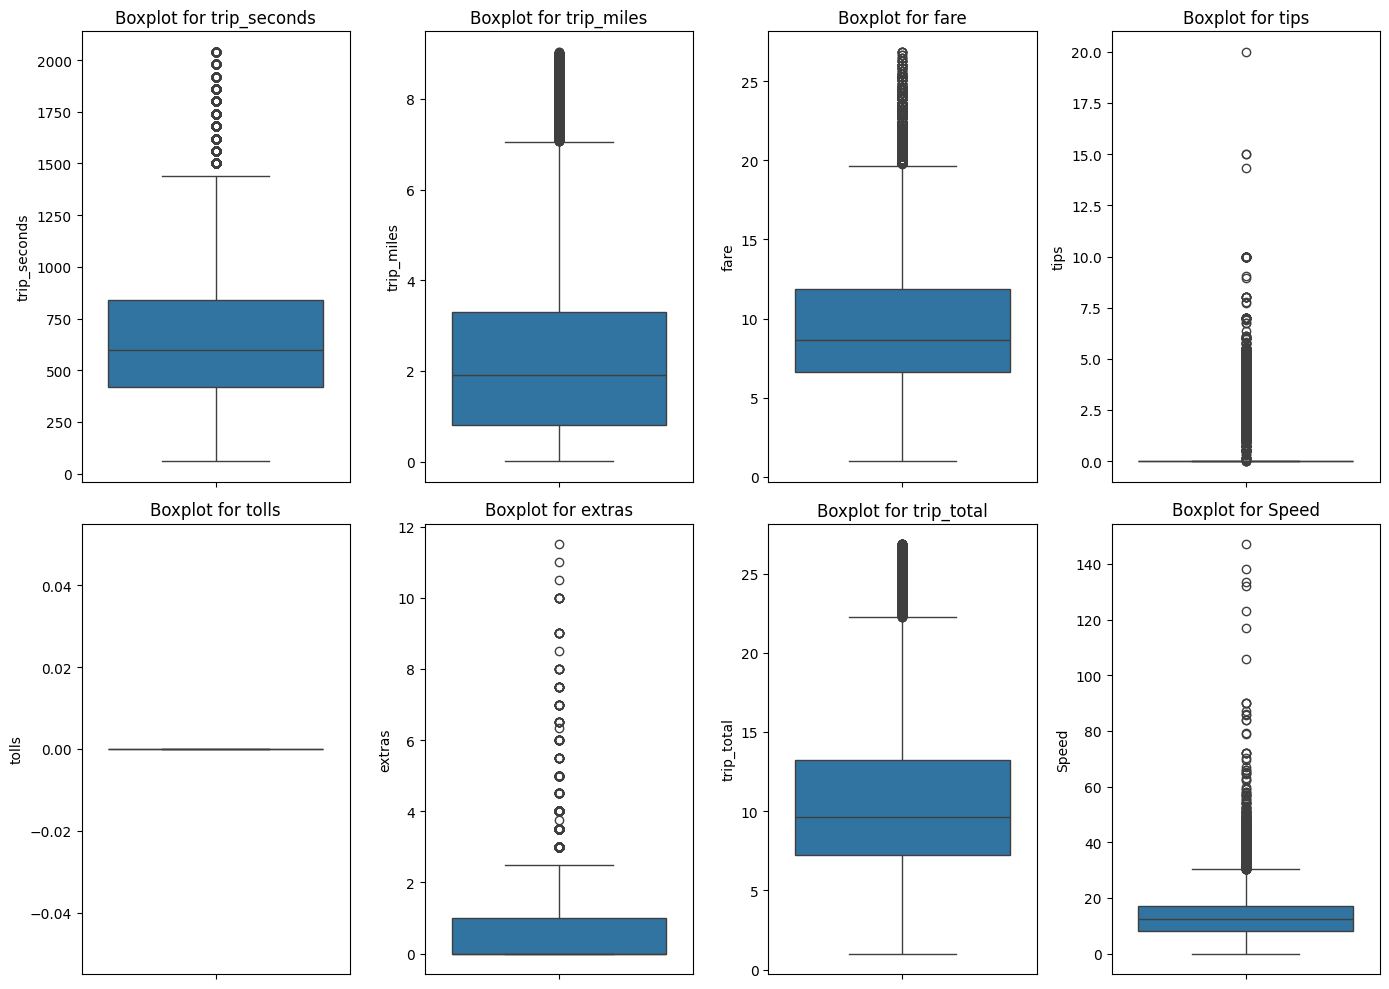

<class 'pandas.core.frame.DataFrame'>
Index: 71179 entries, 1 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              71179 non-null  string 
 1   taxi_id                 71179 non-null  string 
 2   trip_seconds            71179 non-null  Int64  
 3   trip_miles              71179 non-null  float64
 4   pickup_community_area   71179 non-null  Int64  
 5   dropoff_community_area  71179 non-null  Int64  
 6   fare                    71179 non-null  float64
 7   tips                    71179 non-null  float64
 8   tolls                   71179 non-null  float64
 9   extras                  71179 non-null  float64
 10  trip_total              71179 non-null  float64
 11  payment_type            71179 non-null  string 
 12  company                 71179 non-null  string 
 13  year                    71179 non-null  int64  
 14  month                   71179 non-null  int

In [33]:
df_final_filtered = df_filtered[
    (df_filtered['trip_seconds'] > 0) & (df_filtered['trip_seconds'] < 2500) &
    (df_filtered['trip_miles'] > 0) & (df_filtered['trip_miles'] < upper_bound_miles) &
    (df_filtered['trip_total'] > 0) & (df_filtered['trip_total'] < upper_bound_trip_total)
]

# Wyświetlenie informacji o przefiltrowanym zbiorze danych
print(df_final_filtered.info())

# Wyświetlenie wszystkich boxplotów dla zmiennych trip_seconds, trip_miles, fare, tips, tolls, extras, trip_total, speed
columns_to_plot = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'Speed']

plt.figure(figsize=(14, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)  # Układ 2x4 dla boxplotów
    sns.boxplot(y=df_final_filtered[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()
print(df_final_filtered.info())

In [44]:
# Filtrowanie zbioru danych, aby zawierał jedynie wiersze z napiwkami różnymi od 0
df_filtered_tips_non_zero = df_filtered[df_filtered['tips'] > 0]

# Wyświetlenie informacji o przefiltrowanym zbiorze danych
df_filtered_tips_non_zero.info()

# Wyświetlenie pierwszych kilku wierszy przefiltrowanego zbioru
df_filtered_tips_non_zero.head()


<class 'pandas.core.frame.DataFrame'>
Index: 19823 entries, 8 to 99998
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              19823 non-null  string 
 1   taxi_id                 19823 non-null  string 
 2   trip_seconds            19823 non-null  Int64  
 3   trip_miles              19823 non-null  float64
 4   pickup_community_area   19823 non-null  Int64  
 5   dropoff_community_area  19823 non-null  Int64  
 6   fare                    19823 non-null  float64
 7   tips                    19823 non-null  float64
 8   tolls                   19823 non-null  float64
 9   extras                  19823 non-null  float64
 10  trip_total              19823 non-null  float64
 11  payment_type            19823 non-null  string 
 12  company                 19823 non-null  string 
 13  year                    19823 non-null  int64  
 14  month                   19823 non-null  int

,unique_key,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,year,month,Speed
8,eadb66356daf65819327caf9edcd2ca949ce5d58,7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...,360,3.40,6,3,9.25,2.0,0.0,0.0,11.25,Credit Card,no company name,2013,10,34.0
11,5803f3e025214cb02743e0e85f1eaa6eaf5a2282,025c4a64d4348a8184bbf4109fea03a717b87f48029d95...,540,3.50,6,8,10.05,3.0,0.0,1.0,14.05,Credit Card,no company name,2013,10,23.333333
13,6d545ff5deac1191d685f091e009995067dad869,93ccda8a38077612a8f32b8bf1b430f8439cf114fefb22...,540,0.34,32,33,10.05,2.0,0.0,0.0,12.05,Credit Card,no company name,2013,10,2.266667
15,71557cd679b8f22e5173c3cfbc31e75fe222656e,6b29392d56c7d58fe76ec1513ab5c0afc54acee011e973...,600,5.90,8,3,14.45,3.0,0.0,0.0,17.45,Credit Card,no company name,2013,10,35.4
16,6fc5278eb4a7e685001a3275a7434d2a88a7c60a,93ccda8a38077612a8f32b8bf1b430f8439cf114fefb22...,720,0.40,32,33,11.25,3.0,0.0,0.0,14.25,Credit Card,no company name,2013,10,2.0


Lower bound for tips: -0.6550000000000002
Upper bound for tips: 6.425000000000001
Mediana dla 'tips' po filtracji: 2.0
Średnia dla 'tips' po filtracji: 2.6508113133134263


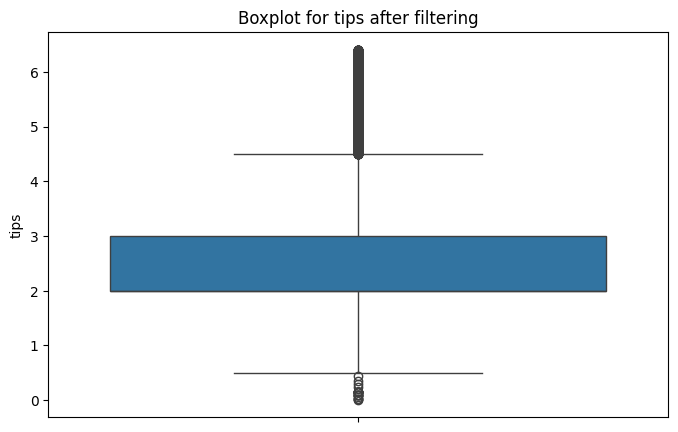

In [45]:
lower_bound_tips, upper_bound_tips = get_outlier_bounds(df_filtered_tips_non_zero, 'tips')

print(f"Lower bound for tips: {lower_bound_tips}")
print(f"Upper bound for tips: {upper_bound_tips}")


df_filtered_tips_box = df_filtered_tips_non_zero[(df_filtered_tips_non_zero['tips'] > 0) & (df_filtered_tips_non_zero['tips'] < upper_bound_tips)]

median_tips = df_filtered_tips_box['tips'].median()
mean_tips = df_filtered_tips_box['tips'].mean()

print(f"Mediana dla 'tips' po filtracji: {median_tips}")
print(f"Średnia dla 'tips' po filtracji: {mean_tips}")


plt.figure(figsize=(8, 5))
sns.boxplot(y=df_filtered_tips_box['tips'])
plt.title('Boxplot for tips after filtering')
plt.show()


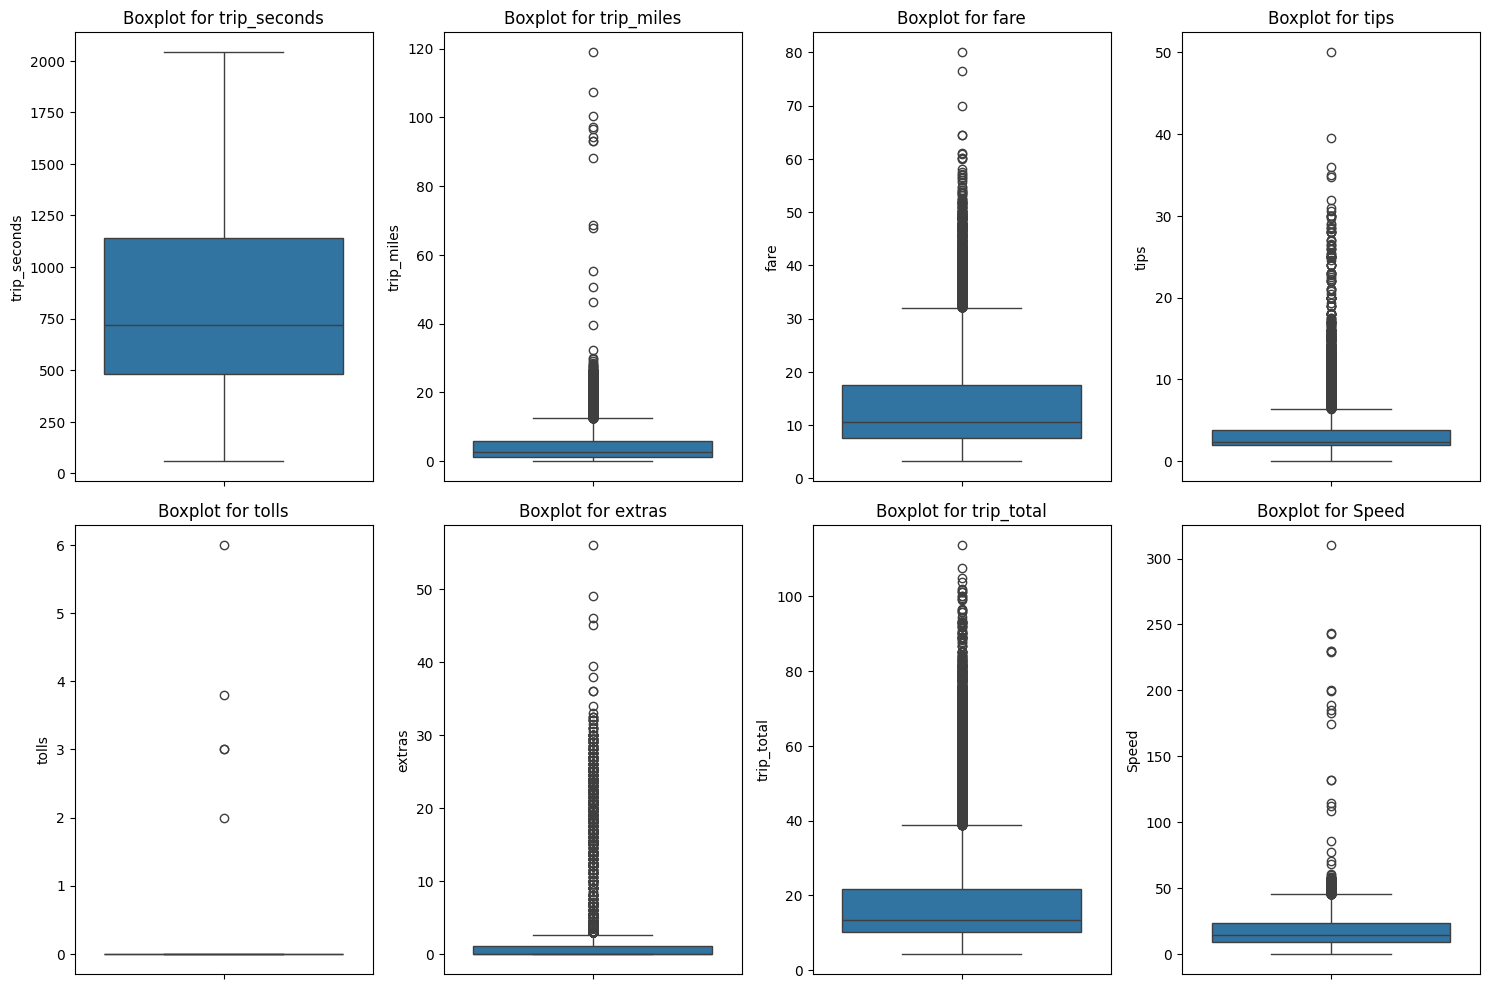

In [46]:
def plot_multiple_boxplots(data, columns):
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(columns, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(y=data[column])
        plt.title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()

# Lista kolumn, dla których chcemy wyświetlić boxploty
columns_to_plot = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'Speed']


plot_multiple_boxplots(df_filtered_tips_non_zero, columns_to_plot)

In [47]:
def filter_data_by_upper_bounds(data, upper_bounds):
    filtered_data = data[
        (data['trip_miles'] < upper_bounds['trip_miles']) &
        (data['fare'] < upper_bounds['fare']) &
        (data['trip_total'] < upper_bounds['trip_total'])
    ]
    return filtered_data

upper_bound_trip_miles = get_outlier_bounds(df_filtered_tips_non_zero, 'trip_miles')[1]
upper_bound_fare = get_outlier_bounds(df_filtered_tips_non_zero, 'fare')[1]
upper_bound_trip_total = get_outlier_bounds(df_filtered_tips_non_zero, 'trip_total')[1]


upper_bounds = {
    'trip_miles': upper_bound_trip_miles,
    'fare': upper_bound_fare,
    'trip_total': upper_bound_trip_total
}


df_filtered_by_upper_bounds = filter_data_by_upper_bounds(df_filtered_tips_non_zero, upper_bounds)
df_filtered_by_upper_bounds.info()

df_filtered_by_upper_bounds.head()

<class 'pandas.core.frame.DataFrame'>
Index: 17239 entries, 8 to 99998
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              17239 non-null  string 
 1   taxi_id                 17239 non-null  string 
 2   trip_seconds            17239 non-null  Int64  
 3   trip_miles              17239 non-null  float64
 4   pickup_community_area   17239 non-null  Int64  
 5   dropoff_community_area  17239 non-null  Int64  
 6   fare                    17239 non-null  float64
 7   tips                    17239 non-null  float64
 8   tolls                   17239 non-null  float64
 9   extras                  17239 non-null  float64
 10  trip_total              17239 non-null  float64
 11  payment_type            17239 non-null  string 
 12  company                 17239 non-null  string 
 13  year                    17239 non-null  int64  
 14  month                   17239 non-null  int

,unique_key,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,year,month,Speed
8,eadb66356daf65819327caf9edcd2ca949ce5d58,7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...,360,3.40,6,3,9.25,2.0,0.0,0.0,11.25,Credit Card,no company name,2013,10,34.0
11,5803f3e025214cb02743e0e85f1eaa6eaf5a2282,025c4a64d4348a8184bbf4109fea03a717b87f48029d95...,540,3.50,6,8,10.05,3.0,0.0,1.0,14.05,Credit Card,no company name,2013,10,23.333333
13,6d545ff5deac1191d685f091e009995067dad869,93ccda8a38077612a8f32b8bf1b430f8439cf114fefb22...,540,0.34,32,33,10.05,2.0,0.0,0.0,12.05,Credit Card,no company name,2013,10,2.266667
15,71557cd679b8f22e5173c3cfbc31e75fe222656e,6b29392d56c7d58fe76ec1513ab5c0afc54acee011e973...,600,5.90,8,3,14.45,3.0,0.0,0.0,17.45,Credit Card,no company name,2013,10,35.4
16,6fc5278eb4a7e685001a3275a7434d2a88a7c60a,93ccda8a38077612a8f32b8bf1b430f8439cf114fefb22...,720,0.40,32,33,11.25,3.0,0.0,0.0,14.25,Credit Card,no company name,2013,10,2.0


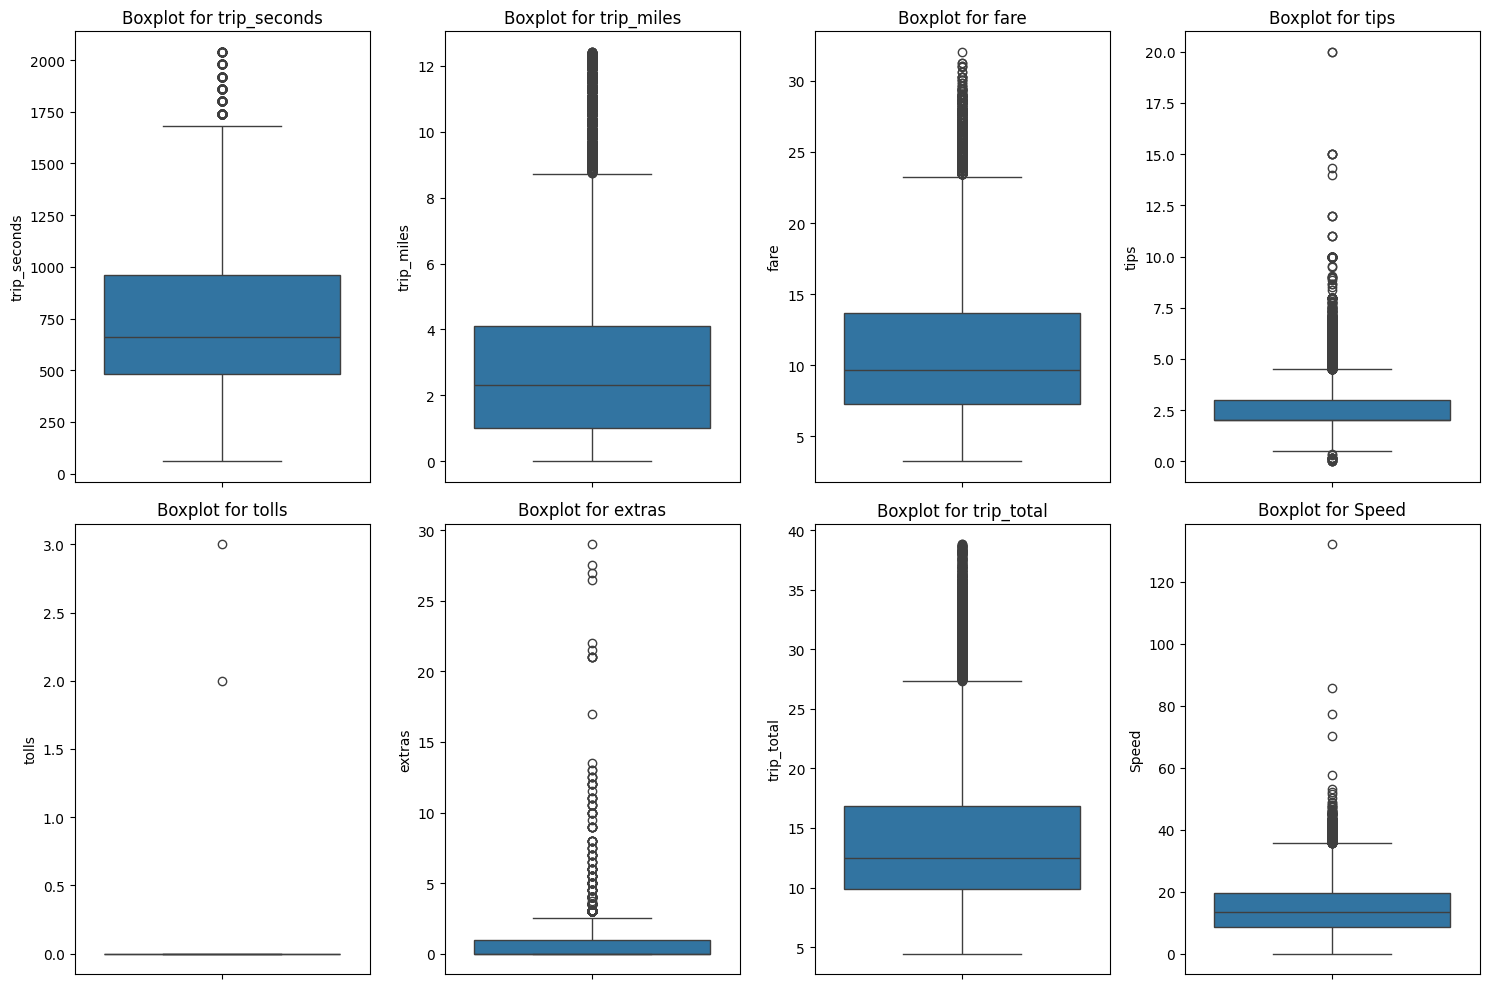

In [48]:
def plot_multiple_boxplots(data, columns):
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(columns, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(y=data[column])
        plt.title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()

# Lista kolumn, dla których chcemy wyświetlić boxploty
columns_to_plot = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'Speed']

# Wywołanie funkcji do wyświetlenia boxplotów
plot_multiple_boxplots(df_filtered_by_upper_bounds, columns_to_plot)

In [51]:

# Podzielenie zbioru na część treningową i testową (np. 70% do treningu, 30% do testów)
train_size = int(len(df_filtered_by_upper_bounds) * 0.7)
full_train_tiping = df_filtered_by_upper_bounds.head(train_size)
full_test_tiping = df_filtered_by_upper_bounds.tail(len(df_filtered_by_upper_bounds) - train_size)

# Usuwanie zmiennych tekstowych lub takich, które nie mogą być przekonwertowane na liczby
full_train_tip_features = full_train_tiping.select_dtypes(include=[float, int])
full_test_tip_features = full_test_tiping.select_dtypes(include=[float, int])

# Definiowanie kolumny z napiwkami ('tips')
full_train_tip_column = full_train_tiping["tips"]
full_test_tip_column = full_test_tiping["tips"]

# Inicjalizacja RandomForestRegressor
full_tip_forest = RandomForestRegressor(max_features='sqrt', min_samples_leaf=1,
                                        min_samples_split=2, n_estimators=50, n_jobs=-1)
# Trenowanie modelu
full_tip_forest.fit(full_train_tip_features, full_train_tip_column)

# Wyświetlenie ważności cech
print(f"Columns: {full_train_tip_features.columns}")
print(f"Importance of the factors: {full_tip_forest.feature_importances_}")

# Przewidywanie na zbiorze treningowym i testowym
full_train_tip_pred = full_tip_forest.predict(full_train_tip_features)
full_test_tip_pred = full_tip_forest.predict(full_test_tip_features)

# Obliczenie Mean Absolute Percentage Error (MAPE) dla zbioru treningowego i testowego
full_train_tip_mape = (mean_absolute_error(full_train_tip_column, full_train_tip_pred)) / (sum(full_train_tip_column) / len(full_train_tip_column))
full_test_tip_mape = (mean_absolute_error(full_test_tip_column, full_test_tip_pred)) / (sum(full_test_tip_column) / len(full_test_tip_column))

print(f"MAPE for train set: {full_train_tip_mape}")
print(f"MAPE for test set: {full_test_tip_mape}")

# Obliczenie Mean Absolute Error (MAE) dla zbioru treningowego i testowego
full_train_tip_mae = mean_absolute_error(full_train_tip_column, full_train_tip_pred)
full_test_tip_mae = mean_absolute_error(full_test_tip_column, full_test_tip_pred)

print(f"MAE for train set: {full_train_tip_mae}")
print(f"MAE for test set: {full_test_tip_mae}")


Columns: Index(['trip_seconds', 'trip_miles', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'year', 'month', 'Speed'],
      dtype='object')
Importance of the factors: [4.50797502e-02 5.59706931e-02 1.61320477e-02 4.79349728e-03
 1.07047912e-01 5.29460211e-01 1.12374295e-05 1.70798351e-02
 2.04423759e-01 0.00000000e+00 1.73859895e-03 1.82624584e-02]
MAPE for train set: 0.007554580071960755
MAPE for test set: 0.021209116405956515
MAE for train set: 0.019747078809977604
MAE for test set: 0.05621871616395975


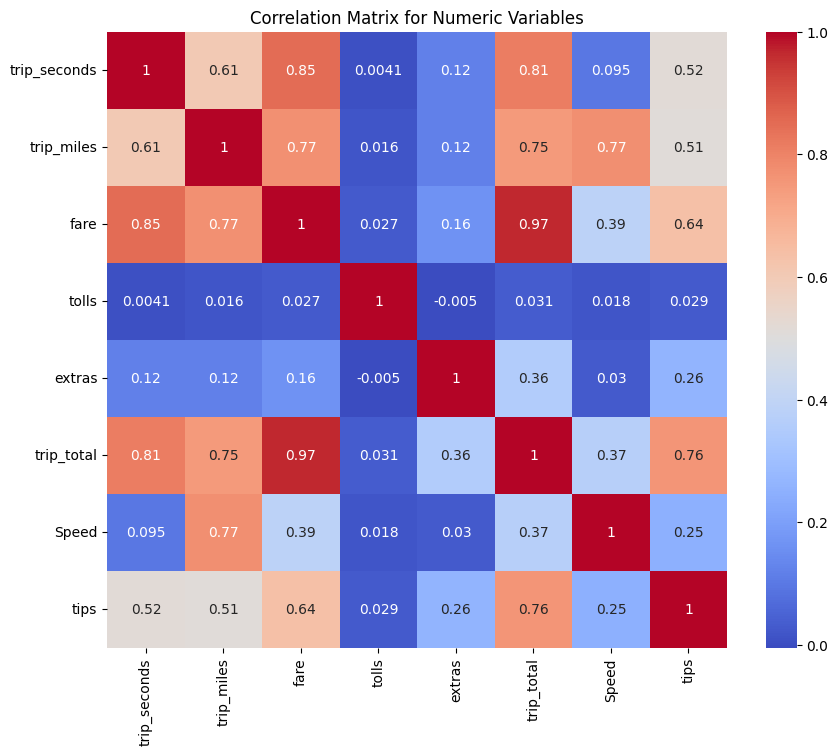

In [53]:

# Wybranie tylko zmiennych numerycznych
numeric_columns = df_filtered_by_upper_bounds[['trip_seconds', 'trip_miles', 'fare', 'tolls', 'extras', 'trip_total', 'Speed', 'tips']]

# Obliczenie korelacji pomiędzy zmiennymi numerycznymi
correlation_matrix = numeric_columns.corr()

# Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numeric Variables")
plt.show()


In [54]:

# Wybrane zmienne do modelu regresji liniowej
X = df_filtered_by_upper_bounds[['fare', 'trip_seconds', 'trip_miles', 'extras', 'Speed']]  # Wybrane zmienne numeryczne
y = df_filtered_by_upper_bounds['tips']

# Podział danych na zbiór treningowy i testowy (70% do treningu, 30% do testów)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicjalizacja modelu regresji liniowej
linear_model = LinearRegression()

# Trenowanie modelu regresji liniowej
linear_model.fit(X_train, y_train)

# Przewidywanie na zbiorze treningowym i testowym
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Obliczenie Mean Absolute Percentage Error (MAPE) dla zbioru treningowego i testowego
train_mape = mean_absolute_error(y_train, y_train_pred) / (sum(y_train) / len(y_train))
test_mape = mean_absolute_error(y_test, y_test_pred) / (sum(y_test) / len(y_test))

print(f"MAPE for train set (Linear Regression): {train_mape}")
print(f"MAPE for test set (Linear Regression): {test_mape}")

# Obliczenie Mean Absolute Error (MAE) dla zbioru treningowego i testowego
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"MAE for train set (Linear Regression): {train_mae}")
print(f"MAE for test set (Linear Regression): {test_mae}")


MAPE for train set (Linear Regression): 0.22788871508123748
MAPE for test set (Linear Regression): 0.22429913116813585
MAE for train set (Linear Regression): 0.5990353357814833
MAE for test set (Linear Regression): 0.5868488395393542


In [55]:

# Wybrane zmienne do modelu Random Forest
X = df_filtered_by_upper_bounds[['fare', 'trip_seconds', 'trip_miles', 'extras', 'Speed']]  # Wybrane zmienne numeryczne
y = df_filtered_by_upper_bounds['tips']

# Podział danych na zbiór treningowy i testowy (70% do treningu, 30% do testów)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicjalizacja modelu Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu Random Forest
rf_model.fit(X_train, y_train)

# Przewidywanie na zbiorze treningowym i testowym
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Obliczenie Mean Absolute Percentage Error (MAPE) dla zbioru treningowego i testowego
train_mape_rf = mean_absolute_error(y_train, y_train_pred_rf) / (sum(y_train) / len(y_train))
test_mape_rf = mean_absolute_error(y_test, y_test_pred_rf) / (sum(y_test) / len(y_test))

print(f"MAPE for train set (Random Forest): {train_mape_rf}")
print(f"MAPE for test set (Random Forest): {test_mape_rf}")

# Obliczenie Mean Absolute Error (MAE) dla zbioru treningowego i testowego
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print(f"MAE for train set (Random Forest): {train_mae_rf}")
print(f"MAE for test set (Random Forest): {test_mae_rf}")


MAPE for train set (Random Forest): 0.12178923337367316
MAPE for test set (Random Forest): 0.2551617784431211
MAE for train set (Random Forest): 0.32013895151657884
MAE for test set (Random Forest): 0.6675968506623258
